# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The dataset selected is the TMDb dataset that contains the data on movies and ratings.

> Trends to be explored here are:
- Popularity over the years
- Revenue over the years
- Runtime over the years

> Associations and Effects [over period spans] to be evaluated are:
- Runtime vs Popularity 
- Runtime vs Revenue 
- Revenue vs Popularity

> Some questions to be answered are:
- Over the decades, what are the popular runtimes?
- Spanning the time periods, is revenue proportional to popularity? 
- Does runtime affect popularity? 


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### General Properties

In [2]:
data_file = "tmdb-movies.csv"

In [3]:
csv_data = pd.read_csv(data_file)

Let's check what our dataframe contains.

In [4]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
csv_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
csv_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<a id='wrangling'></a>
## Data Wrangling

> Data is relatively clean, Let's start with removing unwanted columns, dupllicate items and null values.

In [7]:
csv_data.duplicated().sum()

1

In [8]:
csv_data.drop_duplicates(inplace=True)

In [9]:
if "tagline" in csv_data:
    del csv_data['tagline']
if "keywords" in csv_data:
    del csv_data['keywords']
if "overview" in csv_data:
    del csv_data['overview']
if "homepage" in csv_data:
    del csv_data['homepage']

In [10]:
csv_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From above output we observe that there are around 10 null imdb id, which shouldn't have been there.
We can consider IMDB Ids unique and if there is no entry for it, we can assume that data was not reliable.
So Let's remove them.


In [11]:
csv_data.dropna(subset=['imdb_id'], inplace=True) 

In [12]:
csv_data.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  40
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Let's check what our dataframe contains now.

In [13]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 17 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
director                10815 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              10855 non-null float64
revenue_adj             10855 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
##### How are runtimes, popularity and revenues trending over time?
- For this analysis, we first group our data based on years, using the variable 'release_year'.
- Then we use in-built functions and histograms to visualize the answers. 
- The reason we use histograms is that we want to note the typical values of variables. Histograms display the counts of variable under consideration and thus, are ideal for our exploration.
- For convenience of reading, observations about each variable is given separately. 
<ul>
<li><a href="#revenue">Revenue</a></li>
<li><a href="#popularity">Popularity</a></li>
<li><a href="#runtime">Runtime</a></li>
</ul>

In [14]:
# This mean data will be used in below detailed analysis(as we are trying to see the effect on different factos over time)
df_rym = csv_data.groupby('release_year').mean()

<a id='revenue'></a>

### Revenue:
- We wish to determine if over the years, what is the likely revenue a movie will generate
- Accordingly, we use a histogram to observe the counts of revenues from our dataset
- Maximum counts will reflect the typical revenue earned by movies

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64


Text(0.5,1,'Revenue Over the Years')

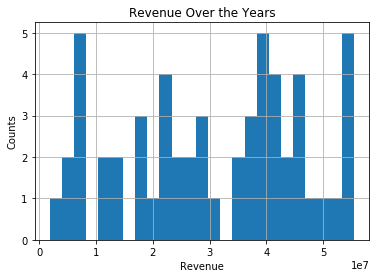

In [15]:
print(df_rym.revenue.describe())
df_rym.revenue.hist(bins=25)
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Revenue Over the Years')

### Observations of Revenues:
From the plots and histogram, we can see that:
- Distribution is left skewed.
- Revenues vary widely.
- Most movie revenues fall in the 3.7e+07 to 4.8e+07 ranges. 

<a id='popularity'></a>

### Popularity:
- We wish to determine if over the years, what is the likely rating a movie will receive
- Accordingly, we use a histogram to observe the counts of popularity from our new dataset
- Maximum counts will reflect the typical popularity rating of movies

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64


Text(0.5,1,'Popularity Over the Years')

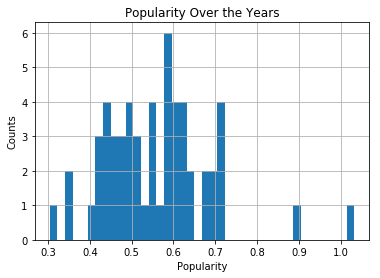

In [16]:
print(df_rym.popularity.describe())
df_rym.popularity.hist(bins=40)
plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title('Popularity Over the Years')

### Observations about Popularity Ratings:
- As evident from histogram and quartile percentages, maximum ratings received fall in the 0.44 to 0.62 ranges. 
- The distribution is skewed to right.
- It is observed that no values lie in different ranges like 0.34-0.4, 0.64-0.66, 0.73-0.88, etc. This needs further analysis.

<a id='runtime'></a>
### Runtime:
- We wish to determine if over the years, there is popular movie running duration
- Accordingly, we use a histogram to observe the counts of movie runtimes from our new dataset
- Maximum counts will reflect the duration that most movies run

count     56.000000
mean     105.714644
std        5.508458
min       96.179331
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64


Text(0.5,1,'Runtime Over the Years')

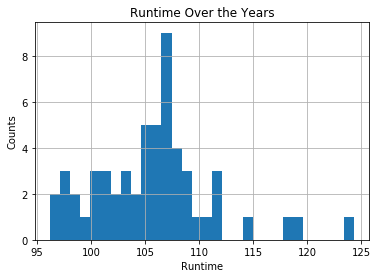

In [17]:
print(df_rym.runtime.describe())
df_rym.runtime.hist(bins=30)
plt.xlabel('Runtime')
plt.ylabel('Counts')
plt.title('Runtime Over the Years')

### Observations about Runtimes:
- As seen in the plots and functions above, popular runtimes over the years are between 106 and 107 minutes.
- Maximum movies fell in the 104-108 range.
- The distribution is right skewed.

<a id='eda2'></a>

## Exploratory Data Analysis

### Research Question 2
#### What variables are associated with the revenues of movies spanning the years? If so, how?
Steps:
- To answer this question,we view the correlation of variables from our dataset grouped over the years.
- In the earlier visualizations, we only viewed one variable after grouping over years.
- Here, we visualize the relations between two variables using scatter plots to view the associations [if any]. 
- We will use scatterplots to visualize as all the values are numeric.
- Below are observations on :
<ul>
<li><a href="#rev_pop">Revenue vs Popularity</a></li>
<li><a href="#rev_vc">Revenue vs Vote Counts</a></li>
<li><a href="#rev_va">Revenue vs Vote Averages</a></li>
</ul>




In [18]:
#using correlation to determine factors influencing revenues
df_rym.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.612610,0.100292,0.152558,-0.441775,0.539964,-0.297719,-0.148336,-0.299723
popularity,0.612610,1.000000,0.668215,0.759156,-0.488974,0.849314,-0.574979,0.458952,-0.100506
budget,0.100292,0.668215,1.000000,0.906124,-0.401485,0.782026,-0.731797,0.891925,-0.158415
revenue,0.152558,0.759156,0.906124,1.000000,-0.466239,0.809243,-0.706442,0.767164,0.074952
runtime,-0.441775,-0.488974,-0.401485,-0.466239,1.000000,-0.612715,0.524770,-0.073168,0.300077
vote_count,0.539964,0.849314,0.782026,0.809243,-0.612715,1.000000,-0.658819,0.505434,-0.215568
vote_average,-0.297719,-0.574979,-0.731797,-0.706442,0.524770,-0.658819,1.000000,-0.557569,0.377204
budget_adj,-0.148336,0.458952,0.891925,0.767164,-0.073168,0.505434,-0.557569,1.000000,0.050086
revenue_adj,-0.299723,-0.100506,-0.158415,0.074952,0.300077,-0.215568,0.377204,0.050086,1.000000


##### From, the above correlation answers, we can see that :
- revenue is correlated positively with popularity and vote counts
- revenue is negatively correlated with vote averages.

In the following scatter plots, We will plot popularity, vote counts and vote averages against our factor of interest: revenue.

<a id='rev_pop'></a>

### Revenue vs Popularity:
Here, we view just how popularity and revenue are related using a scatterplot.

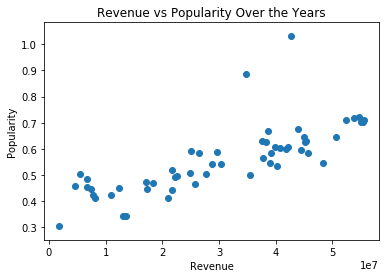

In [19]:
# Creating a scatterplot of revenue and popularity over the years
plt.scatter(x=df_rym['revenue'], y=df_rym['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');

#### Observations- Revenue vs Popularity:
- The correlation computed from function is evident in the scatterplot. 
- Popularity is proportional to revenues. 
- The few outliers that grossed medium but were rated extremely high need to be looked into.

<a id='rev_vc'></a>

### Revenue vs Vote counts:
Here, we view how vote counts and revenue are related using a scatterplot.

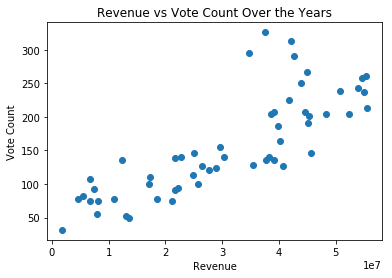

In [20]:
# Creating a scatterplot of revenue and vote counts over the years
plt.scatter(x=df_rym['revenue'], y=df_rym['vote_count'])
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.title('Revenue vs Vote Count Over the Years');

#### Observations- Revenue vs Vote Count:
- The correlation computed from function is evident in the scatterplot. 
- Vote count is roughly proportional to revenues. 
- Even in this plot, we observe that a few sample had high counts but did not gross commensurately in revenue. 
- This plot points us to scrutinize the vote counts and type of votes if possible or any other factors influencing voting such as *genres, cast,* etc.

<a id='rev_va'></a>

### Revenue vs Vote averages:
Here, we visualize how vote averages and revenue are related using a scatterplot.

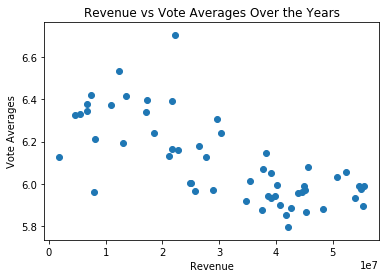

In [21]:
# Creating a scatterplot of revenue and vote averages over the years
plt.scatter(x=df_rym['revenue'], y=df_rym['vote_average'])
plt.xlabel('Revenue')
plt.ylabel('Vote Averages')
plt.title('Revenue vs Vote Averages Over the Years');

#### Observations- Revenue vs Vote Average:
- The correlation computed from function is evident in the scatterplot. 
- Vote averages are inversely proportional to revenues. 
- Considering this plot and the previous, we can infer voting variables as influencing revenues. This means that detailed analysis is required to assess the outliers and possibly pursue a detailed line of investigation based on vote counts and averages.

<a id='limitations'></a>
## Limitations:
- In the above analysis, we have worked with runtimes, popularity and revenues, along that we can look for other factors such as: directors or the cast.
- There were some mismatch in revenue for which I think we haven't consider different revenue sources like movies ticket sales, audio rights sales, satelites rights, etc. and disregard the period and markets over which the revenues are collected. Older movies that are cast over television or re-released and might garner higher revenues are examples of limitations of the dataset and hence, this EDA. 
- The medium through which popularity was determined is unknown. This can impact the analysis as the limitations and bias inherent while gauging audience response will be present in the end values too. 
- This analysis assumes that the same index and methods were employed for collecting popularity factors and counting votes for all movies. In the event that it is not so, the results might not hold true. [a possibility since movies are from different countries and languages]
- While we did not have missing values for any of the factors under consideration, we acknowledge the presence of these limitations and assumptions in our analysis.

<a id='conclusions'></a>
## Conclusions

- From our Analysis, we discovered that over the years, there are *patterns to runtimes, popularity and revenues*. 
- In our analysis we chose to analyze *over time [release_year], the effect of particular variables [votes and popularity] on our factor of interest [revenue]*.
- While only tentative, we found that popular runtimes range between 106 and 107 minutes.
- Also, ratings had maximum likelihood of being in the 0.44 to 0.62 range.
- Revenues showed a wider range, but the most likely range was 3.7e+07 to 4.8e+07.
- Based on this analysis, we found that over the years, popularity and revenue show a direct relation. 
- Vote counts and revenue are related positively while vote averages are inversely related to revenues.
- However, these relations are merely correlations and do not imply causation.
- These lines of analysis point us to the need for further investigation, especially with regards to votes.